In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker  

In [19]:
#importando o arquivo
vendas = pd.read_csv('C:/Users/Pessoal/Downloads/dados_vendas.csv')

In [20]:
# lendo o arquivo 
vendas.head()

,Data_Venda,Vendedor,Cliente,Produto,Quantidade,Preco_Unitario,Valor_Total
0,2024-10-01,Carlos,Ana Sophia Araújo,Teclado,2,1154.89,2309.78
1,2025-01-29,Carlos,Ana Júlia Vieira,Notebook,5,2138.51,10692.55
2,2024-11-06,Carlos,Vicente Cavalcanti,Mouse,2,2551.51,5103.02
3,2025-02-20,Carlos,Ana Júlia Vieira,Mouse,5,2126.62,10633.10
4,2024-11-18,Rafael,Pedro Lucas Moreira,Teclado,1,3806.10,3806.10


In [21]:
#calculando a receita total

receita_total = vendas["Valor_Total"].sum()
print(receita_total)

1487670.05


In [22]:
#trnasformando data em datetime 

vendas['Data_Venda'] = pd.to_datetime(vendas['Data_Venda'])

In [ ]:
# vendas por messes

vendas['Mes_Ano'] = vendas["Data_Venda"].dt.to_period("M") 


In [ ]:
# agrupando os messes com o valor total 
faturamento_por_mes = vendas.groupby("Mes_Ano")["Valor_Total"].sum()

In [25]:
# retornando o mes e o maior faturamento 
mes_maior_faturamento = faturamento_por_mes.idxmax()
valor_maior_faturamento = faturamento_por_mes.max()

In [26]:
# retornando o mes e o menor faturamento 
mes_menor_faturamento = faturamento_por_mes.idxmin()
valor_menor_faturamento = faturamento_por_mes.min()

In [27]:
#exibindo

print(f"📈 Mês de maior faturamento: {mes_maior_faturamento} - R$ {valor_maior_faturamento:,.2f}")
print(f"📉 Mês de menor faturamento: {mes_menor_faturamento} - R$ {valor_menor_faturamento:,.2f}")

📈 Mês de maior faturamento: 2025-01 - R$ 300,292.26
📉 Mês de menor faturamento: 2024-09 - R$ 28,740.72


In [28]:
# ordenando os messes corretamente
faturamento_por_mes = faturamento_por_mes.sort_index()

C:\Users\Pessoal\AppData\Local\Temp\ipykernel_10468\3218852523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_por_mes.index.astype(str), y=faturamento_por_mes.values, palette="Blues")


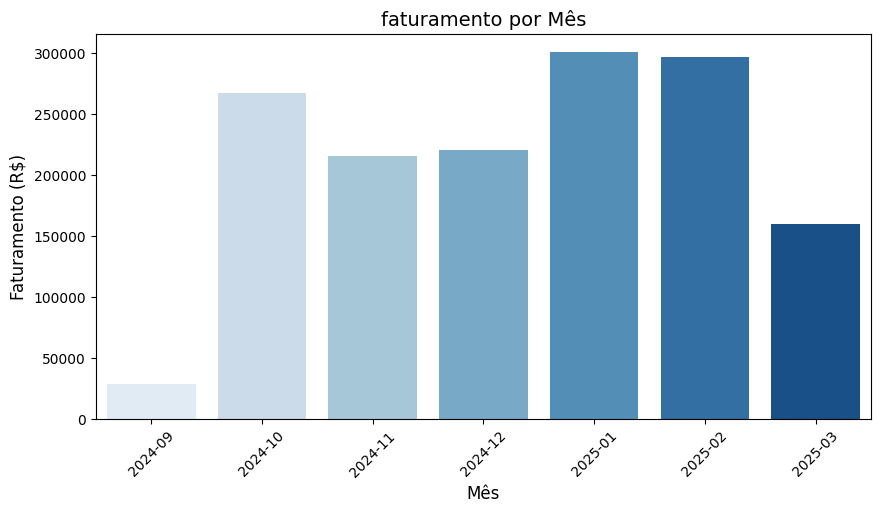

In [29]:
# criando gráfico 
plt.figure(figsize=(10,5))
sns.barplot(x=faturamento_por_mes.index.astype(str), y=faturamento_por_mes.values, palette="Blues")
plt.title("faturamento por Mês", fontsize = 14)
plt.xlabel("Mês",fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize =12)
plt.xticks(rotation=45)

plt.show()

In [41]:
# descobrindo receita por produto

receita_por_produto = vendas.groupby("Produto")["Valor_Total"].sum().sort_values(ascending=False)

In [42]:
print(receita_por_produto)

Produto
Mouse         319175.78
Notebook      299424.80
Impressora    298260.41
Teclado       286228.66
Monitor       284580.40
Name: Valor_Total, dtype: float64


In [ ]:
# Pedindo o pedido mais vendido e o valor do produto

produto_mais_vendido = receita_por_produto.idxmax()
valor_mais_vendido = receita_por_produto.max()

In [ ]:
print(f"📈 Produto mais vendido: {produto_mais_vendido} - Receita: R$ {valor_mais_vendido:,.2f}")

📈 Produto mais vendido: Mouse - Receita: R$ 319,175.78


In [48]:
vendas.head()

,Data_Venda,Vendedor,Cliente,Produto,Quantidade,Preco_Unitario,Valor_Total,Mes_Ano
0,2024-10-01,Carlos,Ana Sophia Araújo,Teclado,2,1154.89,2309.78,2024-10
1,2025-01-29,Carlos,Ana Júlia Vieira,Notebook,5,2138.51,10692.55,2025-01
2,2024-11-06,Carlos,Vicente Cavalcanti,Mouse,2,2551.51,5103.02,2024-11
3,2025-02-20,Carlos,Ana Júlia Vieira,Mouse,5,2126.62,10633.10,2025-02
4,2024-11-18,Rafael,Pedro Lucas Moreira,Teclado,1,3806.10,3806.10,2024-11


In [51]:
ranking_produtos = vendas.groupby("Produto")["Valor_Total"].sum().reset_index()

In [52]:
ranking_produtos = ranking_produtos.sort_values(by="Valor_Total",ascending=False)

C:\Users\Pessoal\AppData\Local\Temp\ipykernel_10468\429932213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking_produtos["Valor_Total"], y=ranking_produtos["Produto"], palette="magma")


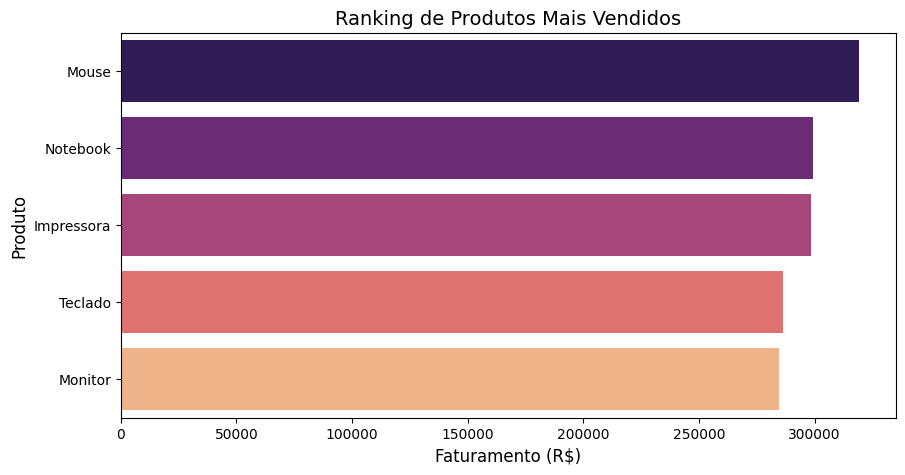

In [53]:

# Criar o gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=ranking_produtos["Valor_Total"], y=ranking_produtos["Produto"], palette="magma")

# Adicionar título e rótulos
plt.title("Ranking de Produtos Mais Vendidos", fontsize=14)
plt.xlabel("Faturamento (R$)", fontsize=12)
plt.ylabel("Produto", fontsize=12)

# Mostrar o gráfico
plt.show()

In [59]:
ranking_Clientes = vendas.groupby("Cliente")["Valor_Total"].sum().reset_index()

In [72]:
ranking_Clientes = ranking_Clientes.sort_values(by="Valor_Total", ascending=False)

In [90]:
print(ranking_Clientes)

    Data_Venda  Vendedor                Cliente     Produto  Quantidade  \
126 2024-12-20   Mariana       Antônio Carvalho  Impressora           5   
147 2024-12-04  Fernanda         Emilly Almeida    Notebook           5   
140 2024-11-19   Mariana       Ana Júlia Vieira    Notebook           5   
86  2024-10-19    Carlos   Sr. Bryan Nascimento    Notebook           5   
28  2025-01-24   Mariana       Antônio Carvalho  Impressora           5   
..         ...       ...                    ...         ...         ...   
64  2024-12-28     Lucas          Clarice Porto  Impressora           5   
37  2025-03-21  Fernanda    Pedro Lucas Moreira       Mouse           1   
167 2024-11-08  Fernanda      Dra. Pietra Viana       Mouse           1   
46  2025-02-20    Carlos  João Gabriel Monteiro  Impressora           1   
60  2025-02-09   Mariana  João Gabriel Monteiro     Teclado           1   

     Preco_Unitario  Valor_Total  Mes_Ano  
126         4820.49     24102.45  2024-12  
147        

In [92]:
ranking_vendedores = vendas.groupby("Vendedor")["Valor_Total"].sum().reset_index()

In [96]:
ranking_vendedores = ranking_vendedores.sort_values(by="Valor_Total",ascending=False)

In [97]:
print(ranking_vendedores)

   Vendedor  Valor_Total
3   Mariana    364478.02
2     Lucas    324205.64
0    Carlos    314253.75
4    Rafael    249516.61
1  Fernanda    235216.03


C:\Users\Pessoal\AppData\Local\Temp\ipykernel_10468\1713185645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking_vendedores["Valor_Total"], y=ranking_vendedores["Vendedor"], palette="magma")


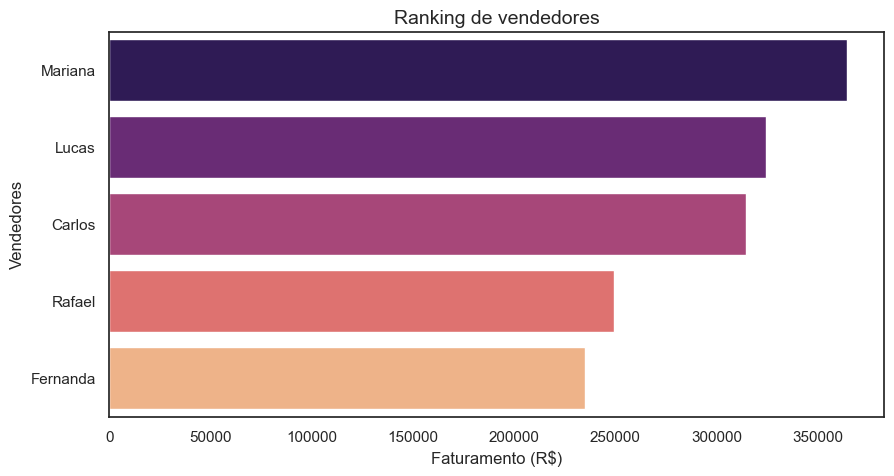

In [101]:
# Criar o gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=ranking_vendedores["Valor_Total"], y=ranking_vendedores["Vendedor"], palette="magma")

# Adicionar título e rótulos
plt.title("Ranking de vendedores", fontsize=14)
plt.xlabel("Faturamento (R$)", fontsize=12)
plt.ylabel("Vendedores", fontsize=12)

# Mostrar o gráfico
plt.show()

In [106]:
vendas.head()

,Data_Venda,Vendedor,Cliente,Produto,Quantidade,Preco_Unitario,Valor_Total,Mes_Ano
0,2024-10-01,Carlos,Ana Sophia Araújo,Teclado,2,1154.89,2309.78,2024-10
1,2025-01-29,Carlos,Ana Júlia Vieira,Notebook,5,2138.51,10692.55,2025-01
2,2024-11-06,Carlos,Vicente Cavalcanti,Mouse,2,2551.51,5103.02,2024-11
3,2025-02-20,Carlos,Ana Júlia Vieira,Mouse,5,2126.62,10633.10,2025-02
4,2024-11-18,Rafael,Pedro Lucas Moreira,Teclado,1,3806.10,3806.10,2024-11


In [115]:

# vendas por messes

vendas['Mes_Ano'] = vendas["Data_Venda"].dt.to_period("M") 


In [ ]:
# agrupando os messes com o valor total 
faturamento_por_mes = vendas.groupby("Mes_Ano")["Valor_Total"].sum()

In [127]:
vendas["Data_Venda"] = pd.to_datetime(vendas["Data_Venda"], errors="coerce")

In [130]:
faturamento_por_mes = vendas.groupby("Mes_Ano")["Valor_Total"].sum().reset_index()

In [131]:
# Calcular a taxa de crescimento percentual em relação ao mês anterior
faturamento_por_mes["Taxa_Crescimento"] = faturamento_por_mes["Valor_Total"].pct_change() * 100

In [ ]:
# Exibir os dados
print(faturamento_por_mes)

   Mes_Ano  Valor_Total  Taxa_Crescimento
0  2024-09     28740.72               NaN
1  2024-10    266704.79        827.968367
2  2024-11    215283.63        -19.280179
3  2024-12    219988.97          2.185647
4  2025-01    300292.26         36.503326
5  2025-02    296933.06         -1.118644
6  2025-03    159726.62        -46.207869


Data_Venda        datetime64[ns]
Vendedor                  object
Cliente                   object
Produto                   object
Quantidade                 int64
Preco_Unitario           float64
Valor_Total              float64
Mes_Ano                period[M]
dtype: object
Valores nulos em 'Valor_Total': 0


C:\Users\Pessoal\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


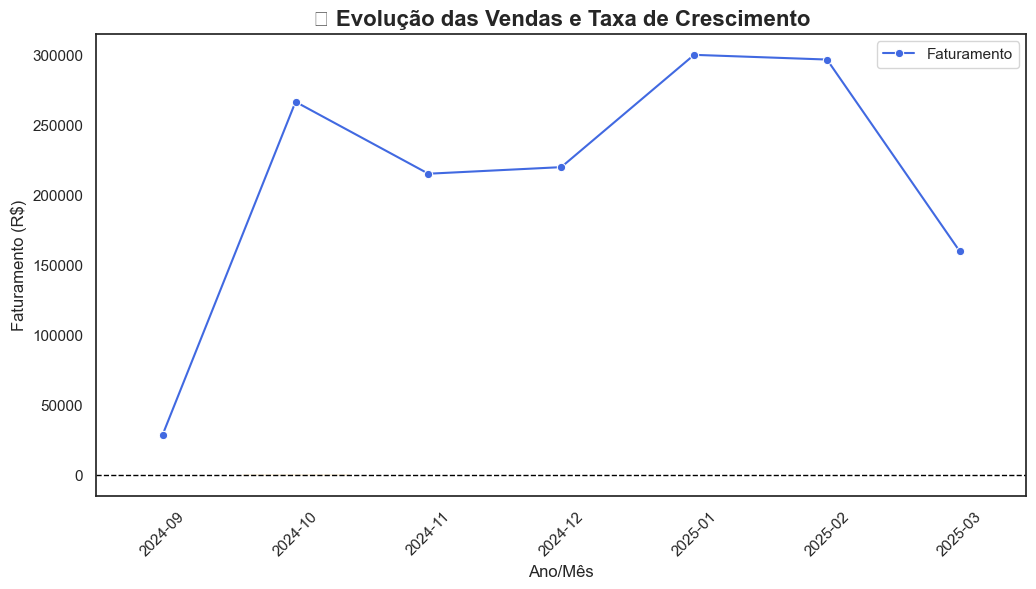

In [ ]:
# criando o gráfico 
plt.figure(figsize=(12, 6))

sns.lineplot(data=faturamento_por_mes, x="Mes_Ano", y="Valor_Total", marker="o", label="Faturamento", color="royalblue")
sns.barplot(data=faturamento_por_mes, x="Mes_Ano", y="Taxa_Crescimento", alpha=0.5, color="orange")

plt.title("📈 Evolução das Vendas e Taxa de Crescimento", fontsize=16, fontweight="bold")
plt.xlabel("Ano/Mês", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.legend()
plt.show()
